# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [21]:
medical.shape

(1338, 8)

In [22]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

Text(0, 0.5, 'number of people')

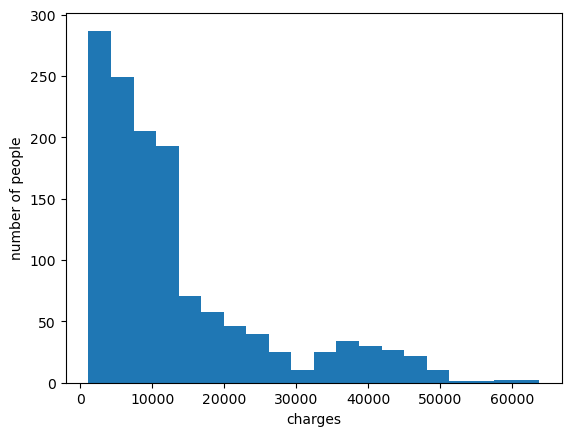

In [23]:
plt.hist(medical.charges, bins=20)
plt.xlabel('charges')
plt.ylabel('number of people')

In [24]:
charge_ma=np.mean(medical.charges)
charge_std=np.std(medical.charges)
print('charge_mean =', charge_ma, 'charge_std =', charge_std)

charge_mean = 13270.422265141257 charge_std = 12105.484975561605


In [25]:
medical.describe #look at overall statistic picture of the dataframe, it has 1338 records

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region      charges  insuranceclaim
0      19    0  27.900         0       1       3  16884.92400               1
1      18    1  33.770         1       0       2   1725.55230               1
2      28    1  33.000         3       0       2   4449.46200               0
3      33    1  22.705         0       0       1  21984.47061               0
4      32    1  28.880         0       0       1   3866.85520               1
...   ...  ...     ...       ...     ...     ...          ...             ...
1333   50    1  30.970         3       0       1  10600.54830               0
1334   18    0  31.920         0       0       0   2205.98080               1
1335   18    0  36.850         0       0       2   1629.83350               1
1336   21    0  25.800         0       0       3   2007.94500               0
1337   61    0  29.070         0       1       1  29141.36030               1

[1338 rows x 8 columns]>

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__If the sample is representative of the population of all charges, and the observations are independent, then the sample mean can be used as an estimate of the population mean, and inferences about the population mean can be made based on the sample mean. Because there is no information on population statistsic, t-test will be used. (t-test is ok for unkown population normality?)

In [26]:
#the total number of record sample that has charge less than 12000
sum(medical.charges<12000) 


846

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__
The null hypothesis is mu=12000. The alternative hypothesis is mu<12000. use one-sided interval.
The critical value for 95% and sample size of more than 120 is 1.65. 

In [29]:
#calculate sample_mean
sample_mean=np.mean(medical.charges)
sample_mean

13270.422265141257

In [30]:
#calcualte sample standard deviation
sample_std=np.std(medical.charges, ddof=1)
sample_std

12110.011236693994

In [33]:
#calculate test statistic
t=(sample_mean-12000)/(sample_std/np.sqrt(1338))
t

3.837351719658534

In [ ]:
#since t is greater than 1.66

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__The null hypothesis is there is no difference in charges made from people with insurance and without insurance. The alternative hypothesis is there is difference in chages made from people with insurance and without insurance. To use t-statistic, the assumption made is that population has a normal distribution.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [51]:
charge_insurance=medical.charges[medical.insuranceclaim==True]
n0=len(charge_insurance)
X0=np.mean(charge_insurance)
#calcualte sample standard deviation using insurance
S0=np.std(charge_insurance, ddof=1)


783

In [50]:
charge_noinsurance=medical.charges[medical.insuranceclaim==False]
n1=len(charge_noinsurance)
X1=np.mean(charge_noinsurance)
#calcualte standard deviation of the charge without using insurance
S1=np.std(charge_noinsurance, ddof=1)


555

In [57]:
#calculate pooled standard deviation of the two groups
Sp=np.sqrt(((n0-1)*S0**2+(n1-1)*S1**2)/(n0+n1-2))`
print('Pooled standard deviation:', Sp)

Pooled standard deviation: 11520.034268775256


In [63]:
#calculate t statistic
ts=(X0-X1)/(Sp*np.sqrt(1/n0+1/n1))
print('ts-statistic from manual calculation:', ts)

ts-statistic from manual calculation: 11.89329903087671


In [70]:
#degree of freedom is n0+n1-2=1336, with 95% confidence level, t critical value is 1.65; therefore, 
#null hypothesis is rejected.
#p-value is the sum of the probability above t and below -t
import scipy.stats as stats
fl=t.cdf(-abs(ts),1336)*2
print('p-value by manual cal:', fl)


p-value by manual cal: 4.461230231620972e-31


In [71]:
from scipy.stats import ttest_ind

t_statistic,p_value=ttest_ind(charge_insurance,charge_noinsurance)
print('t-statistic:', t_statistic)
print('p-value:', p_value)

t-statistic: 11.893299030876712
p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__I don't see an equivaent one for performing a z-test. But z-test can be manually calculated just like what it is done in the above t-test. 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test